**RQ2: How does SLIM_GSGP behave in terms of performance and model size compared to standard GP and traditional GSGP?**

Experimental Setup:

10 (will be 30 for the final version) Monte Carlo Runs for 18 Datasets with the fixed configurations:


config_all = {

    'pop_size': 100, #will be 200 for final version
    'n_iter': 500,  #will be 2000 for final version
    'elitism': True,
    'n_elites': 1,
    'init_depth': 6,
    'initializer': 'rhh',
    'tournament_size': 2,
    'prob_const': 0.2,
    'tree_functions': ['add', 'subtract', 'multiply', 'divide'],
    'tree_constants': np.linspace(-10, 10, num=201).round(1).tolist(),
    'fitness_function': sigmoid_rmse,
    'minimization' : True,
    'seed': None, #based on monte_carlo_run
    'log_path' : None, #based on monte_carlo_run
    'verbose': False,
    'log_level': 0,
    'test_elite': True

}

basic_config_gp = {

    'p_xo': 0.8,
    'max_depth': 17

}

basic_config_gsgp = {

    'p_xo': 0,
    'ms_lower': 0,
    'ms_upper': 1,
    'reconstruct' : True

}

basic_config_slim= {

    'slim_version': None, #for all versions
    'ms_lower': 0,
    'ms_upper': 1,
    'p_inflate': 0.5,
    'reconstruct': True,
    'copy_parent': True

}









In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath("../"))
from analysis import *
import warnings
warnings.filterwarnings("ignore")

In [2]:
%%capture
ana_compa = ComparisonAnalysis('comparison')

In [3]:
ana_compa.logs['algorithm'].unique()

array(['GP', 'GSGP', 'SLIM*SIG1', 'SLIM+SIG1'], dtype=object)

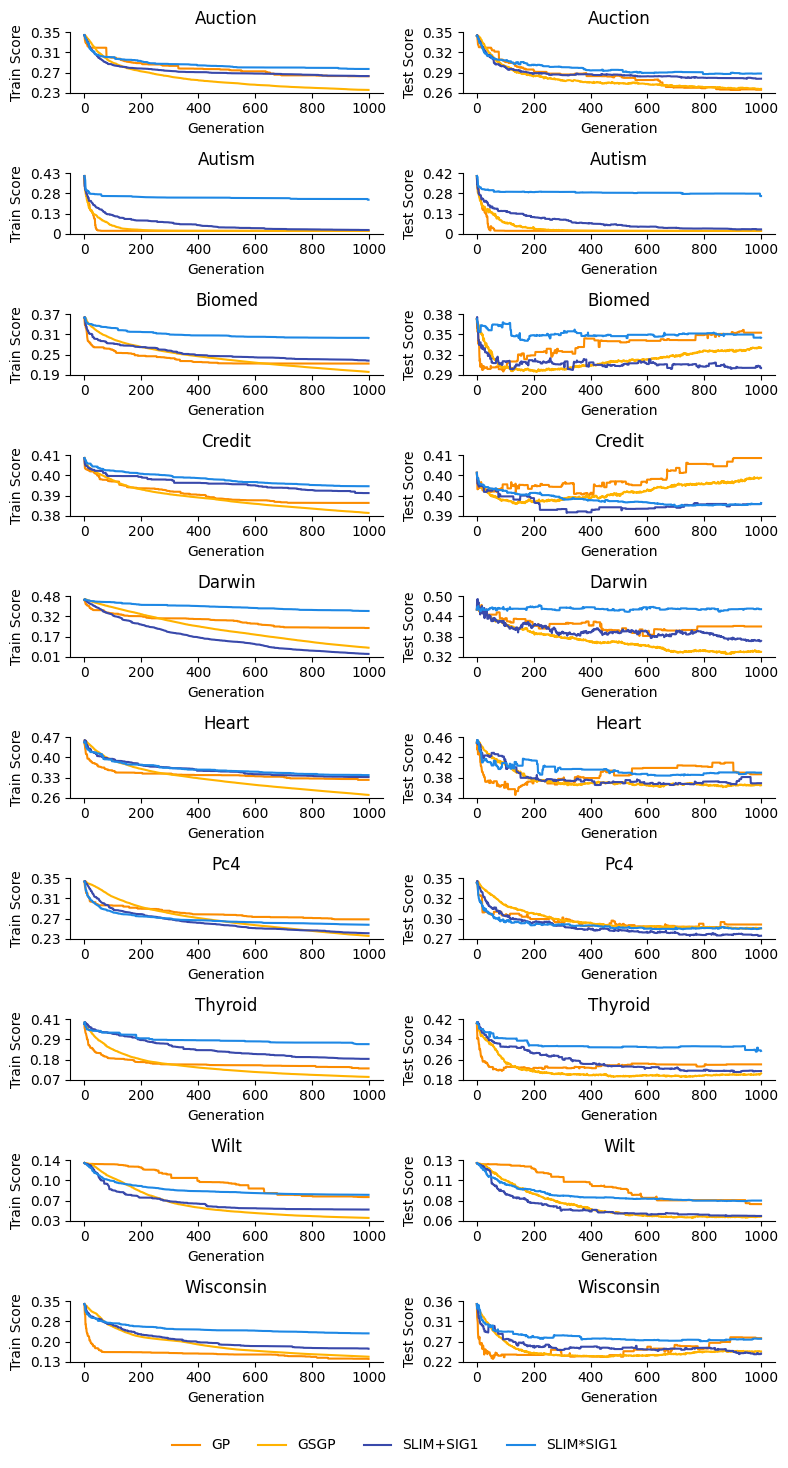

In [4]:
ana_compa.performance_evolution_plot[0]

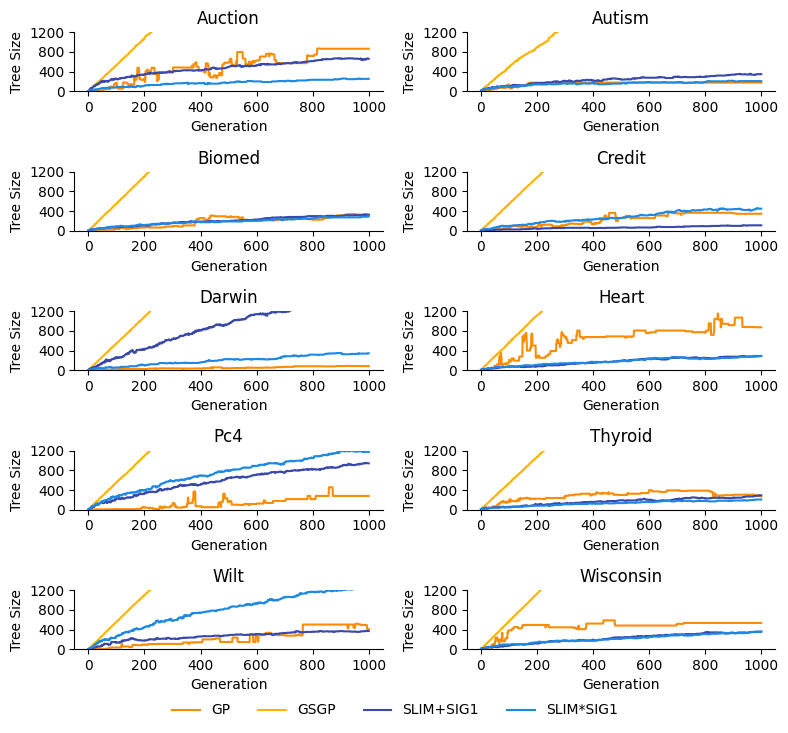

In [5]:
ana_compa.tree_size_evolution_plot[0]

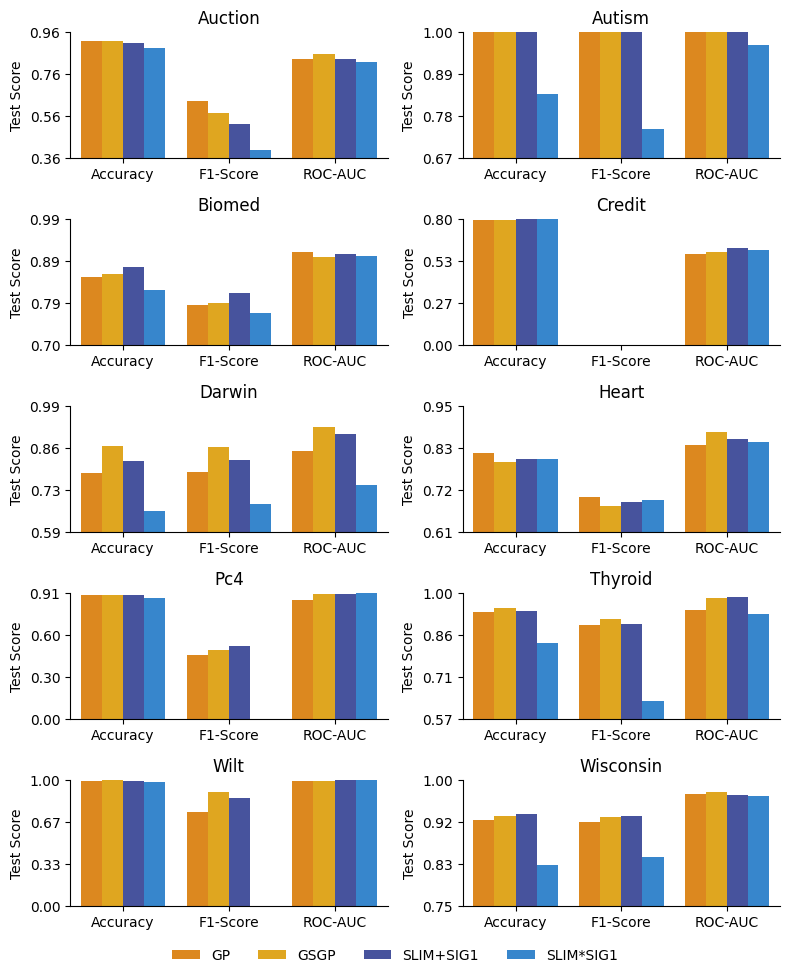

In [6]:
ana_compa.performance_plot[0]

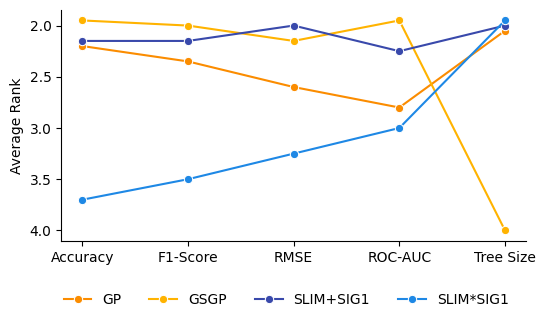

In [7]:
ana_compa.ranks_plot[0]

In [8]:
ana_compa.friedman_pvalues

,Metric,P-Value,Significant
0,Accuracy,0.000218,Yes
1,F1-Score,0.000949,Yes
4,RMSE,0.030845,Yes
2,ROC-AUC,0.039602,Yes
3,Tree Size,0.000104,Yes


In [9]:
ana_compa.wtl_1v1

Metric,Algorithm,Accuracy,F1-Score,RMSE,ROC-AUC,Tree Size
0,GP vs GSGP,0-8-2,0-8-2,1-6-3,0-6-4,10-0-0
1,GP vs SLIM*SIG1,8-2-0,6-4-0,3-7-0,2-7-1,3-4-3
2,GP vs SLIM+SIG1,1-8-1,1-7-2,2-3-5,0-7-3,1-7-2
3,GSGP vs SLIM*SIG1,8-2-0,7-3-0,5-4-1,6-3-1,0-0-10
4,GSGP vs SLIM+SIG1,1-9-0,1-9-0,2-7-1,3-6-1,0-0-10
5,SLIM*SIG1 vs SLIM+SIG1,0-2-8,0-3-7,0-2-8,0-6-4,4-3-3


In [10]:
get_wilcoxon_rank_pvalues(ana_compa.wtl_detailed, 'algorithm')

,metric,algorithm_1,algorithm_2,p_value,significant
0,test.accuracy,GP,GSGP,0.102470,False
1,test.accuracy,GP,SLIM*SIG1,0.010321,True
2,test.accuracy,GP,SLIM+SIG1,0.712702,False
3,test.accuracy,GSGP,GP,0.102470,False
4,test.accuracy,GSGP,SLIM*SIG1,0.009375,True
5,test.accuracy,GSGP,SLIM+SIG1,0.256839,False
6,test.accuracy,SLIM*SIG1,GP,0.010321,True
7,test.accuracy,SLIM*SIG1,GSGP,0.009375,True
8,test.accuracy,SLIM*SIG1,SLIM+SIG1,0.008386,True
9,test.accuracy,SLIM+SIG1,GP,0.712702,False
